In [8]:
# discretization 
import pandas as pd 
import seaborn as sns 
from sklearn.preprocessing import KBinsDiscretizer


In [9]:
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='age', ylabel='Count'>

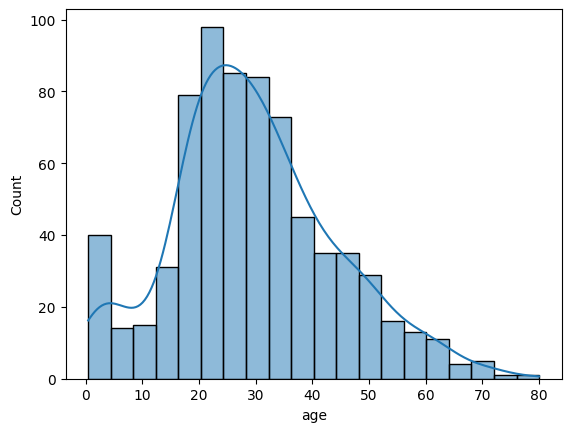

In [10]:
sns.histplot(df['age'],kde=True)


In [11]:
# impute the missing values  
df['age']=df['age'].fillna(df['age'].median())
df['fare']=df['fare'].fillna(df['fare'].median())



In [20]:

age_discretizer=KBinsDiscretizer(n_bins=8,encode='ordinal',strategy='uniform')
df['age_bins']=age_discretizer.fit_transform(df[['age']])
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_bins
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,2.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,3.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,2.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,3.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,3.0


<Axes: xlabel='age_bins', ylabel='Count'>

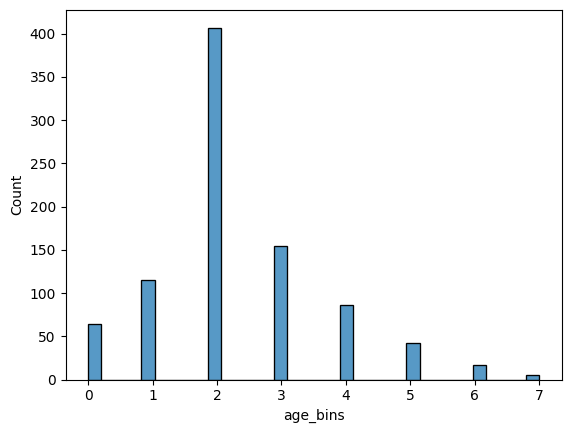

In [21]:
sns.histplot(df, x='age_bins')


<Axes: xlabel='age', ylabel='Count'>

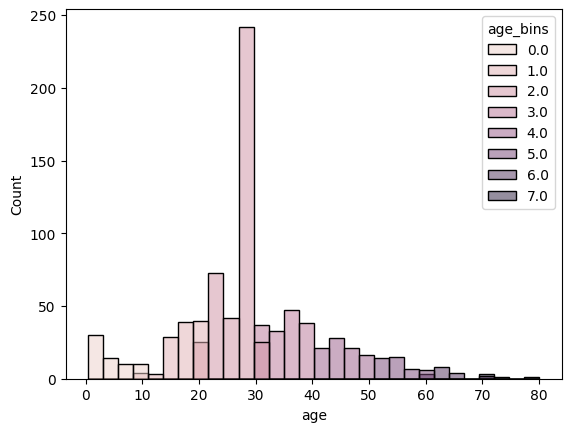

In [22]:
sns.histplot(df,x='age',hue='age_bins')

<Axes: xlabel='age', ylabel='Count'>

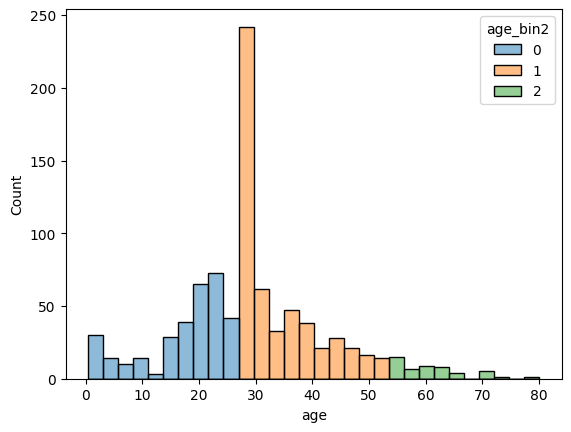

In [23]:
# pandas method for manual binning 
df['age_bin2']=pd.cut(df['age'],bins=3,labels=[0,1,2])
sns.histplot(df,x='age',hue='age_bin2')

<Axes: xlabel='age', ylabel='Count'>

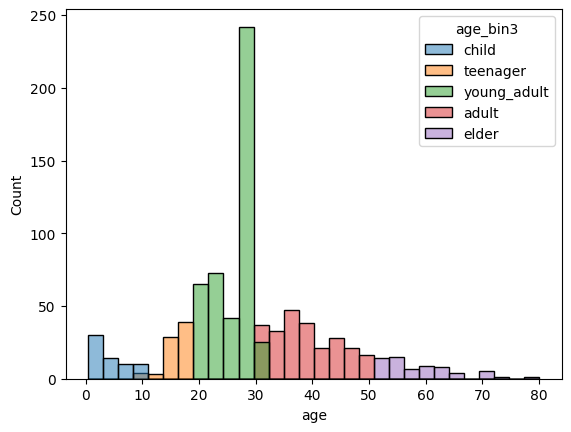

In [24]:
# DEFINE THE BINS 
bins=[0,10,18,30,50,80]
labels=['child','teenager','young_adult','adult','elder']
df['age_bin3']=pd.cut(df['age'],bins=bins,labels=labels)
sns.histplot(df,x='age',hue='age_bin3')